In [ ]:
import torch.nn.functional as F


Files already downloaded and verified
Files already downloaded and verified


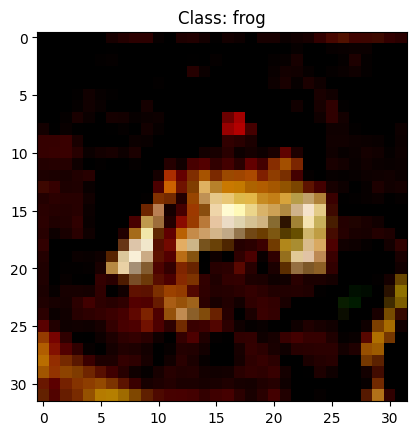

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Define transformations for data augmentation and normalization
transform = transforms.Compose([
    transforms.ToTensor(),           # Convert images to tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalize to range [-1, 1]
])

# Load CIFAR-10 dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False)

# Define class labels
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Display a sample image
sample_img, sample_label = trainset[0]
plt.imshow(sample_img.permute(1, 2, 0))  # Convert tensor to image format
plt.title(f"Class: {classes[sample_label]}")
plt.show()


In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=5, stride=1, padding=0)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=0)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Compute the size after convolutions (5x5x32 from earlier calculations)
        self.fc3 = nn.Linear(5*5*32, 128)
        self.fc4 = nn.Linear(128, 64)
        self.fc_out = nn.Linear(64, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # Conv1 -> ReLU -> MaxPool
        x = self.pool(F.relu(self.conv2(x)))  # Conv2 -> ReLU -> MaxPool
        x = torch.flatten(x, start_dim=1)     # Flatten
        x = F.relu(self.fc3(x))               # FC3 -> ReLU
        x = F.relu(self.fc4(x))               # FC4 -> ReLU
        x = self.fc_out(x)                    # Output layer (No activation)
        return x

# Initialize model
model = CNN()


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [ ]:
# Training loop
epochs = 5  # Number of training epochs
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(epochs):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(trainloader):
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()  # Reset gradients
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights

        running_loss += loss.item()
        if i % 100 == 99:  # Print loss every 100 mini-batches
            print(f"Epoch {epoch+1}, Batch {i+1}, Loss: {running_loss/100:.4f}")
            running_loss = 0.0

print("Training Finished!")


Epoch 1, Batch 100, Loss: 2.0561
Epoch 1, Batch 200, Loss: 1.8322
Epoch 1, Batch 300, Loss: 1.7180
Epoch 1, Batch 400, Loss: 1.6278
Epoch 1, Batch 500, Loss: 1.5552
Epoch 1, Batch 600, Loss: 1.5291
Epoch 1, Batch 700, Loss: 1.4829
Epoch 1, Batch 800, Loss: 1.4598
Epoch 1, Batch 900, Loss: 1.4140
Epoch 1, Batch 1000, Loss: 1.4076
Epoch 1, Batch 1100, Loss: 1.3705
Epoch 1, Batch 1200, Loss: 1.3922
Epoch 1, Batch 1300, Loss: 1.3070
Epoch 1, Batch 1400, Loss: 1.3160
Epoch 1, Batch 1500, Loss: 1.2932
Epoch 2, Batch 100, Loss: 1.2020
Epoch 2, Batch 200, Loss: 1.2413
Epoch 2, Batch 300, Loss: 1.2278
Epoch 2, Batch 400, Loss: 1.1769
Epoch 2, Batch 500, Loss: 1.2082
Epoch 2, Batch 600, Loss: 1.2039
Epoch 2, Batch 700, Loss: 1.1789
Epoch 2, Batch 800, Loss: 1.2143
Epoch 2, Batch 900, Loss: 1.1704
Epoch 2, Batch 1000, Loss: 1.1674
Epoch 2, Batch 1100, Loss: 1.1538
Epoch 2, Batch 1200, Loss: 1.1525
Epoch 2, Batch 1300, Loss: 1.1331
Epoch 2, Batch 1400, Loss: 1.1360
Epoch 2, Batch 1500, Loss: 1.118

In [ ]:
correct = 0
total = 0
model.eval()  # Set model to evaluation mode (disable dropout, etc.)

with torch.no_grad():  # No need to compute gradients during testing
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)  # Get the highest probability class
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")


Test Accuracy: 67.06%


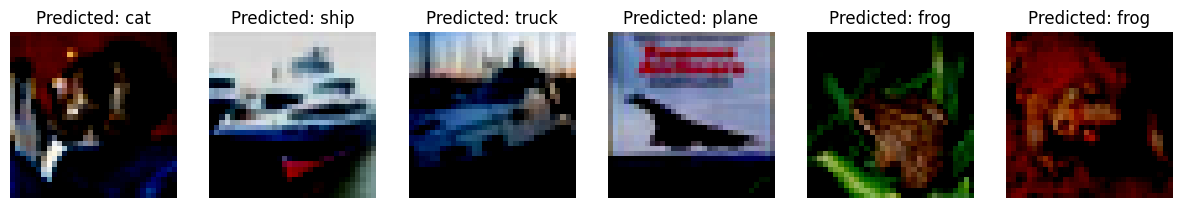

In [ ]:
import numpy as np

# Get a batch of test images
dataiter = iter(testloader)
images, labels = next(dataiter)

# Move images to GPU if available
images, labels = images.to(device), labels.to(device)

# Make predictions
outputs = model(images)
_, predicted = torch.max(outputs, 1)

# Display images with predictions
fig, axes = plt.subplots(1, 6, figsize=(15, 5))
for i in range(6):
    img = images[i].cpu().permute(1, 2, 0)  # Convert to numpy image format
    axes[i].imshow(img)
    axes[i].set_title(f"Predicted: {classes[predicted[i]]}")
    axes[i].axis('off')

plt.show()


In [14]:
import tensorflow as tf

def convolutional_model(input_shape):
    """
    Implements the forward propagation for the model:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> DENSE

    Arguments:
    input_shape -- shape of the input dataset, e.g., (64, 64, 3)

    Returns:
    model -- TF Keras model (object containing the information for the entire training process)
    """

    input_img = tf.keras.Input(shape=input_shape)

    # CONV2D: 8 filters 4x4, stride of 1, padding 'same'
    Z1 = tf.keras.layers.Conv2D(filters=8, kernel_size=(4, 4), strides=(1, 1), padding='same')(input_img)

    # RELU
    A1 = tf.keras.layers.ReLU()(Z1)

    # MAXPOOL: window 4x4, stride 4, padding 'same'
    P1 = tf.keras.layers.MaxPooling2D(pool_size=(4, 4), strides=(4, 4), padding='same')(A1)

    # CONV2D: 16 filters 2x2, stride 1, padding 'same'
    Z2 = tf.keras.layers.Conv2D(filters=16, kernel_size=(2, 2), strides=(1, 1), padding='same')(P1)

    # RELU
    A2 = tf.keras.layers.ReLU()(Z2)

    # MAXPOOL: window 2x2, stride 2, padding 'same'
    P2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(A2)

    # FLATTEN
    F = tf.keras.layers.Flatten()(P2)

    # Dense layer with 6 neurons and softmax activation
    outputs = tf.keras.layers.Dense(units=6, activation='softmax')(F)

    # Create the model
    model = tf.keras.Model(inputs=input_img, outputs=outputs)

    return model

In [15]:
# Define the input shape
input_shape = (64, 64, 3)  # Example input shape (height, width, channels)

# Create the model
model = convolutional_model(input_shape)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 8)           │             392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_3 (ReLU)                       │ (None, 64, 64, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 16)          │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_4 (ReLU)                       │ (None, 16, 16, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 6)                   │           6,150 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,070 (27.62 KB)

 Trainable params: 7,070 (27.62 KB)

 Non-trainable params: 0 (0.00 B)